In [ ]:
# Spam Email Classifier

In [36]:
# Step 1: Import Required Libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load and Prepare the Dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
# Keep only relevant columns: 'v1' as label, 'v2' as message text
df = df[['v1','v2']]
df.columns = ['label','text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
# Convert labels: 'ham' → 0, 'spam' → 1
df['label'] = df['label'].map({'ham':0, 'spam':1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


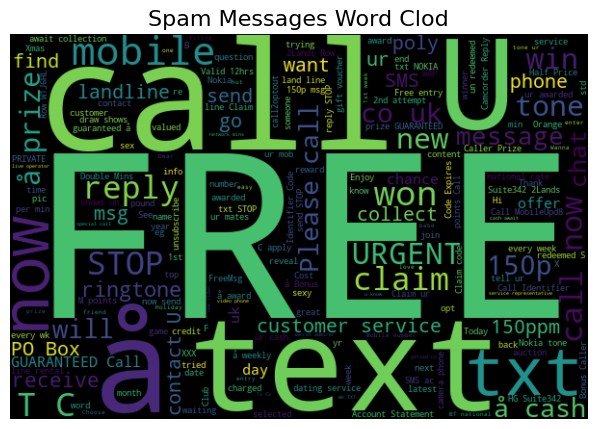

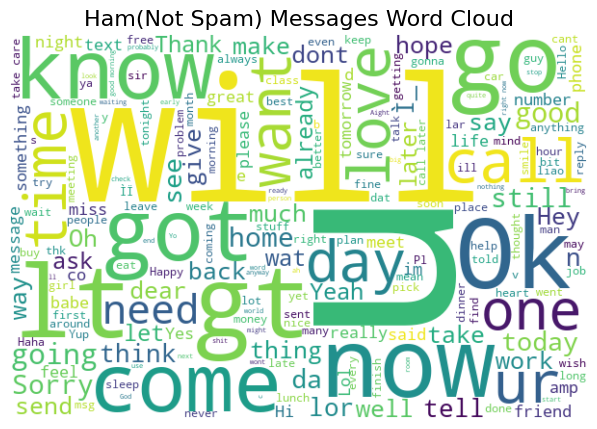

In [41]:
# Step 3: Exploratory Data Analysis (EDA) – WordClouds

# Combine all spam and ham messages separately
spam_words = ' '.join(df[df['label'] == 1]['text'])
ham_words = ' '.join(df[df['label'] == 0]['text'])

# Create WordCloud for spam and ham messages
spam_wc = WordCloud(width=600, height=400, background_color='black').generate(spam_words)
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

# display WordCloud for spam and ham messages
plt.figure(figsize=(10,5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Spam Messages Word Clod", fontsize=16)
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Ham(Not Spam) Messages Word Cloud",fontsize=16)
plt.show()

In [42]:
# Step 4: Train/Test Split
X = df['text']
y = df['label']

# Split data into 80% train, 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

print("Training samples : ", len(X_train))
print("Testing samples : ", len(X_test))

Training samples :  4457
Testing samples :  1115


In [43]:
# Step 5: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [44]:
# Step 6: Train the Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_tf, y_train)

MultinomialNB()

In [45]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test_tf)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ", round(accuracy * 100, 2), "%")

print("\nConfusion Matrix : ")
print(confusion_matrix(y_test,y_pred))

print("\nClassification Report : ")
print(classification_report(y_test,y_pred))

Accuracy :  96.68 %

Confusion Matrix : 
[[965   0]
 [ 37 113]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [46]:
# Step 8: Test Sample Predictions
# Example 1: Spam message
sample = ["Congratulations! You've won a free iPhone. Click the below link to claim"]

sample_tf = tfidf.transform(sample)
prediction = model.predict(sample_tf)

print("Spam" if prediction[0] == 1 else "Not Spam")

Spam


In [47]:
# Example 2: Ham message
sample = ["Hey, are we still meeting at 6 PM?"]
sample_tf = tfidf.transform(sample)
prediction = model.predict(sample_tf)
print("Spam" if prediction[0] == 1 else "Not Spam")

Not Spam
